<div class="alert alert-block alert-info">
    <h1>Thiago Kuma</h1>
</div>

http://linkedin.com/in/thiago-kuma

In [1]:
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
    <h1>Exploração de Dados</h1>
</div>

## Objetivo

### Entendimento do que é o dataset
    - Observar características
        - Tamanho
        - Completude
        - Retidão ("Corretude")
        - Tipos de dados
        - Possível relações entre os dados
    - Passos importantes
        - Carregamento
        - Visualização
        - Manipulação
        - Correlação

<div class="alert alert-block alert-info">
    <h2>Fontes dos dados</h2>
</div>

### Dados de Imigrantes
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/base-de-dados-do-centro-de-referencia-e-atendimento-para-imigrantes-crai/resource/7eb866c0-02a3-4215-893d-d0b62a196c0c

<div class="alert alert-block alert-info">
    <h2>Carregamento de Dados</h2>
</div>

In [2]:
!ls

'Aula 03-03-2020 Estatística Básica (Escola Livre de IA) alunos.pdf'
 aula03.sh
 bancocrai2014a2019.csv
 dicionario-de-bancocrai2014a2019.csv
'Escola Livre IA - Aula03.ipynb'


### Em geral existe um dicionário de dados

In [3]:
!head -n 15 dicionario-de-bancocrai2014a2019.csv

### Observação inicial dos dados

#### Fatos importantes na observação
1) O arquivo é CSV  
2) Existe coluna de cabeçalho  
3) As colunas estão separadas por ";"  
4) O encoding do arquivo

In [4]:
!head -n 2 bancocrai2014a2019.csv

##### Encoding em Python
https://docs.python.org/3/library/codecs.html#standard-encodings

In [5]:
df = pd.read_csv('bancocrai2014a2019.csv', sep=';', encoding='iso8859_2')

<div class="alert alert-block alert-info">
    <h2>Observação Dados</h2>
</div>

In [6]:
df.shape #Quantidade linhas x colunas

(11834, 15)

In [7]:
df.columns #Colunas nomes

Index(['data_entrada_brasil', 'data_cadastro', 'dif_dtcad_dtingr_meses',
       'sexo', 'fx_etaria', 'pais_origem', 'distrito_moradia',
       'condicoes_moradia', 'cidade_ingresso', 'cor_raca', 'escolaridade',
       'situacao_migratoria', 'fonte_renda', 'sabendo_crai', 'demanda_1'],
      dtype='object')

In [8]:
df.info() #Tipo e contagem por coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11834 entries, 0 to 11833
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   data_entrada_brasil     11834 non-null  object
 1   data_cadastro           11834 non-null  object
 2   dif_dtcad_dtingr_meses  11834 non-null  object
 3   sexo                    11834 non-null  object
 4   fx_etaria               11834 non-null  object
 5   pais_origem             11834 non-null  object
 6   distrito_moradia        11834 non-null  object
 7   condicoes_moradia       11834 non-null  object
 8   cidade_ingresso         11834 non-null  object
 9   cor_raca                11834 non-null  object
 10  escolaridade            11834 non-null  object
 11  situacao_migratoria     11834 non-null  object
 12  fonte_renda             11834 non-null  object
 13  sabendo_crai            11834 non-null  object
 14  demanda_1               11834 non-null  object
dtypes:

<div class="alert alert-block alert-info">
    <h2>Transformações Dados</h2>
</div>

In [9]:
df['data_entrada_brasil'].unique()

array(['09/09/2012', '16/06/2015', '05/03/2010', ..., '09/07/1980',
       '07/05/2011', '14/05/2011'], dtype=object)

### Transformando em data

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [10]:
datetime.datetime.strptime('07/05/2011', '%d/%m/%Y')

datetime.datetime(2011, 5, 7, 0, 0)

##### O erro!!! Vamos então aplicar transformando string em data :D
- Dataframe.apply / lambda https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [11]:
# df['data_entrada_brasil'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))

##### filtrando antes de aplicar

In [12]:
df[df['data_entrada_brasil'] == 'Năo informado']

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1
7,Năo informado,10/12/2014,Năo informado,Masculino,40 a 49 anos,África do Sul,Năo informado,Aluguel ou pensăo,Năo informado,Preta,Ensino fundamental completo,Indocumentado/ Irregular,Năo informado,Năo informado,Năo informado
8,Năo informado,11/12/2014,Năo informado,Masculino,30 a 39 anos,África do Sul,Năo informado,Aluguel ou pensăo,Năo informado,Preta,Ensino médio completo,Solicitante de refúgio,Năo informado,Năo informado,Năo informado
9,Năo informado,09/02/2015,Năo informado,Masculino,50 a 59 anos,África do Sul,Năo informado,Centro de Acolhida,Năo informado,Branca,Ensino médio completo,Indocumentado/ Irregular,Năo informado,Năo informado,Năo informado
10,Năo informado,26/03/2015,Năo informado,Masculino,30 a 39 anos,África do SuL,Năo informado,Centro de Acolhida,Năo informado,Branca,Ensino médio completo,Visto permanente,Năo informado,Năo informado,Năo informado
76,Năo informado,24/11/2014,Năo informado,Feminino,40 a 49 anos,Angola,Năo informado,Aluguel ou pensăo,Năo informado,Preta,Ensino superior completo,Indocumentado/ Irregular,Năo informado,Năo informado,Năo informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11001,Năo informado,04/03/2015,Năo informado,Feminino,40 a 49 anos,Venezuela,Năo informado,Sem moradia,Năo informado,Preta,Ensino fundamental completo,Indocumentado/ Irregular,Năo informado,Năo informado,Năo informado
11504,Năo informado,20/02/2019,Năo informado,Masculino,50 a 59 anos,Venezuela,Outro Município,Outros,Năo informado,Branca,Outros,Outros,Desempregado,Outros,Regularizaçăo migratória
11823,Năo informado,19/12/2014,Năo informado,Masculino,50 a 59 anos,Venezuela,Năo informado,Centro de Acolhida,Năo informado,Parda,Ensino superior completo,Solicitante de refúgio,Năo informado,Năo informado,Năo informado
11824,Năo informado,23/01/2015,Năo informado,Masculino,30 a 39 anos,Vietnă,Năo informado,Casa própria,Năo informado,Branca,Ensino médio completo,Visto permanente,Năo informado,Năo informado,Năo informado


In [13]:
df['data_entrada_brasil_formatado'] = \
    df[df['data_entrada_brasil'] != 'Năo informado']['data_entrada_brasil'].apply(
        lambda x: datetime.datetime.strptime(x, '%d/%m/%Y')
    )
df.head()

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1,data_entrada_brasil_formatado
0,09/09/2012,27/05/2016,44,Masculino,Maiores de 60 anos,Afeganistăo,Liberdade,Aluguel ou pensăo,Năo informado,Amarela,Ensino superior incompleto,Visto permanente,Năo informado,Năo informado,Documentos,2012-09-09
1,16/06/2015,31/05/2017,23,Masculino,18 a 29 anos,Afeganistăo,Brás,Aluguel ou pensăo,Foz do Iguaçu,Branca,Ensino superior incompleto,Solicitante de refúgio,Trabalhador informal ou ambulante,Serviço público,Regularizaçăo migratória,2015-06-16
2,05/03/2010,19/03/2018,96,Masculino,18 a 29 anos,Afeganistăo,Pari,Aluguel ou pensăo,Guarulhos,Branca,Ensino fundamental incompleto,Visto permanente,"Empresário (MEI, dono de loja, restaurante, etc.)",Instituiçőes ou organizaçőes,Regularizaçăo migratória,2010-03-05
3,25/07/2012,27/11/2018,76,Masculino,18 a 29 anos,Afeganistăo,Outro Município,Casa de parente ou amigo,Guarulhos,Branca,Ensino superior incompleto,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Reinserçăo no mercado de trabalho,2012-07-25
4,10/10/2008,10/01/2019,123,Masculino,40 a 49 anos,Afeganistăo,Brás,Casa de parente ou amigo,Guarulhos,Branca,Năo frequentou escola,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Regularizaçăo migratória,2008-10-10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11834 entries, 0 to 11833
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data_entrada_brasil            11834 non-null  object        
 1   data_cadastro                  11834 non-null  object        
 2   dif_dtcad_dtingr_meses         11834 non-null  object        
 3   sexo                           11834 non-null  object        
 4   fx_etaria                      11834 non-null  object        
 5   pais_origem                    11834 non-null  object        
 6   distrito_moradia               11834 non-null  object        
 7   condicoes_moradia              11834 non-null  object        
 8   cidade_ingresso                11834 non-null  object        
 9   cor_raca                       11834 non-null  object        
 10  escolaridade                   11834 non-null  object        
 11  situacao_migrat

#### Visualizando frequência de imigração por ano

In [15]:
df['ano_entrada'] = df['data_entrada_brasil_formatado'].apply(lambda x: x.year)
df['ano_entrada'].unique()

array([2012., 2015., 2010., 2008., 2019.,   nan, 2013., 2011., 1992.,
       2016., 2005., 2017., 2014., 2018., 2009., 2007., 1993., 2006.,
       1999., 1989., 2003., 1994., 1986., 1978., 1977., 2001., 1973.,
       2002., 1970., 1996., 1982., 2000., 2004., 1998., 1988., 1987.,
       1962., 1990., 1966., 1959., 1997., 1995., 1964., 1985., 1971.,
       1981., 1963., 1972., 1984., 1979., 1967., 1976., 1953., 1968.,
       1955., 1983., 1991., 1965., 1980., 1934., 1969., 1975., 1952.,
       1974., 1958.])

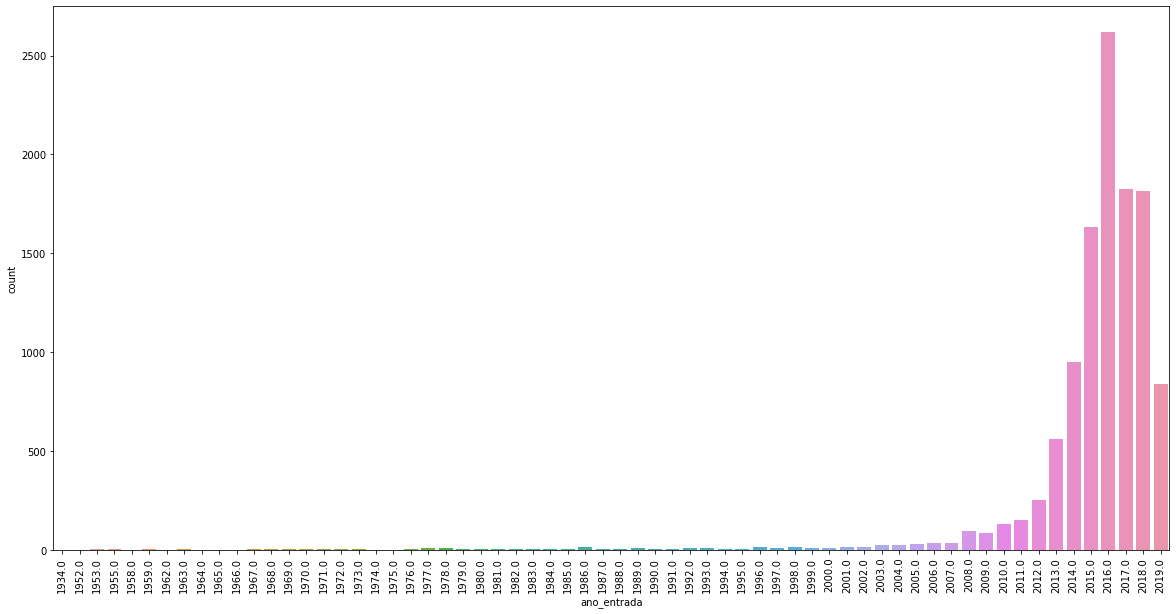

In [16]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='ano_entrada', data=df)
ax.set_xticklabels(rotation=90, labels=ax.get_xticklabels())
ax

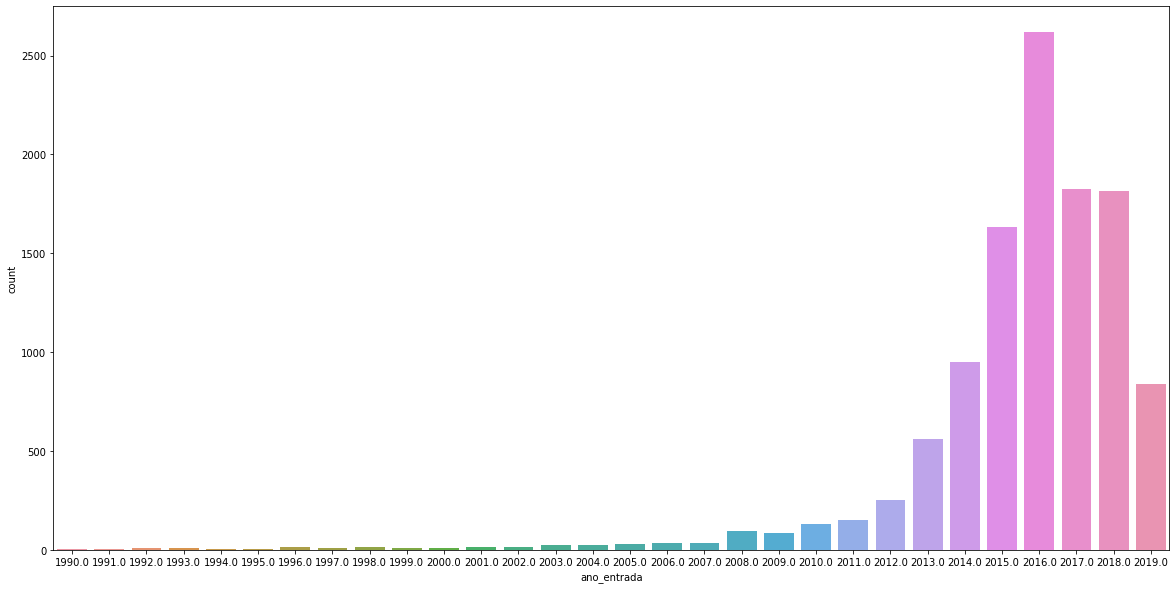

In [17]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='ano_entrada', data=df[df['ano_entrada'].between(1990,2019)])

##### Observamos que existe um crescimento, porém... O que aconteceu em 2016?
- Vamos observar agora por pais de origem nesse ano... Qual seria a origem mais provável pelo aumento?

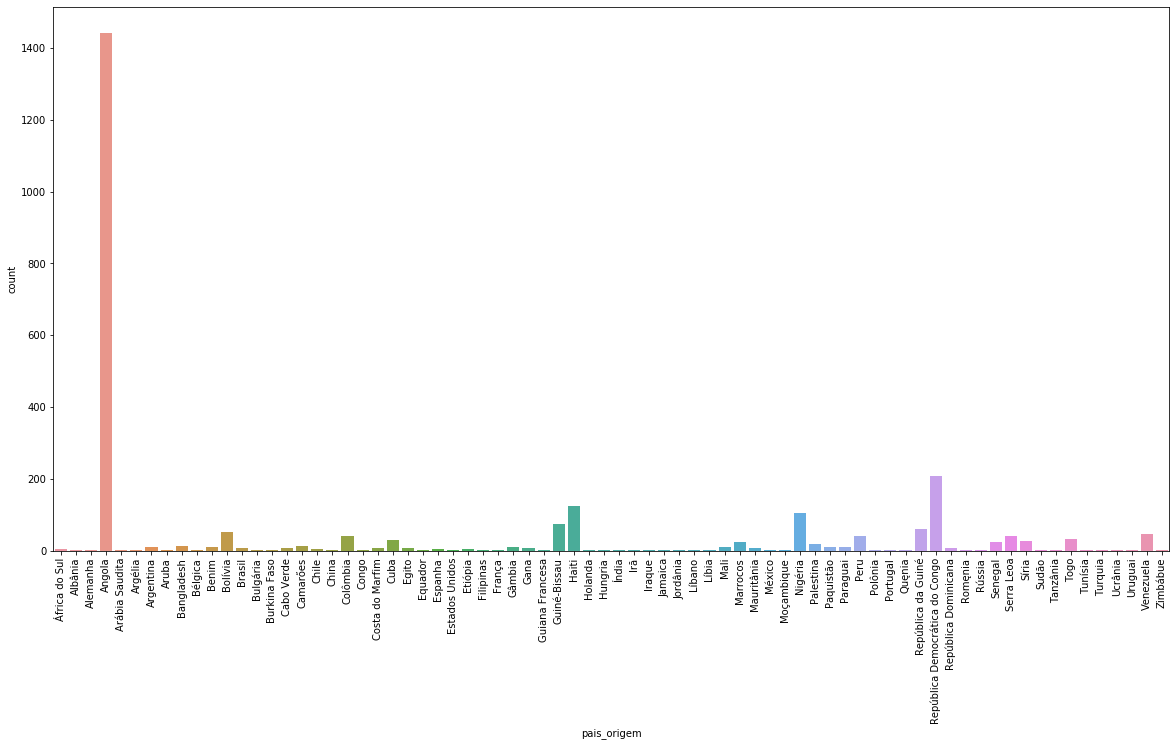

In [18]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='pais_origem', data=df[df['ano_entrada'] == 2016])
ax.set_xticklabels(rotation=90, labels=ax.get_xticklabels())
ax

#### Vamos observar o aumento só de imigrantes de lá

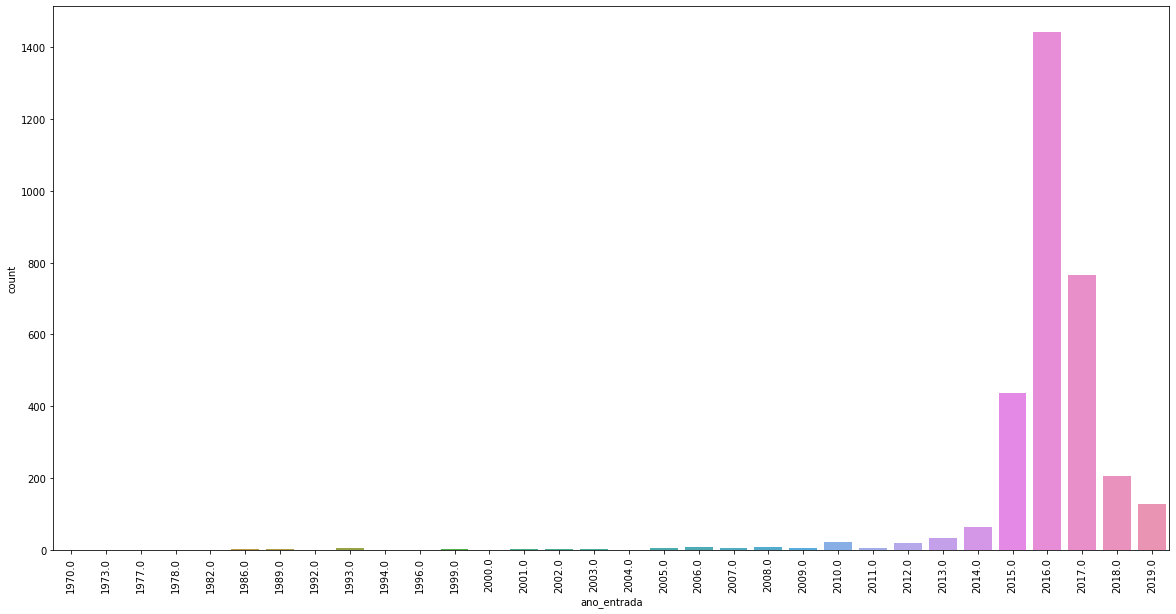

In [19]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='ano_entrada', data=df[df['pais_origem'] == 'Angola'])
ax.set_xticklabels(rotation=90, labels=ax.get_xticklabels())
ax

##### E se olharmos também no tempo Venezuelanos?

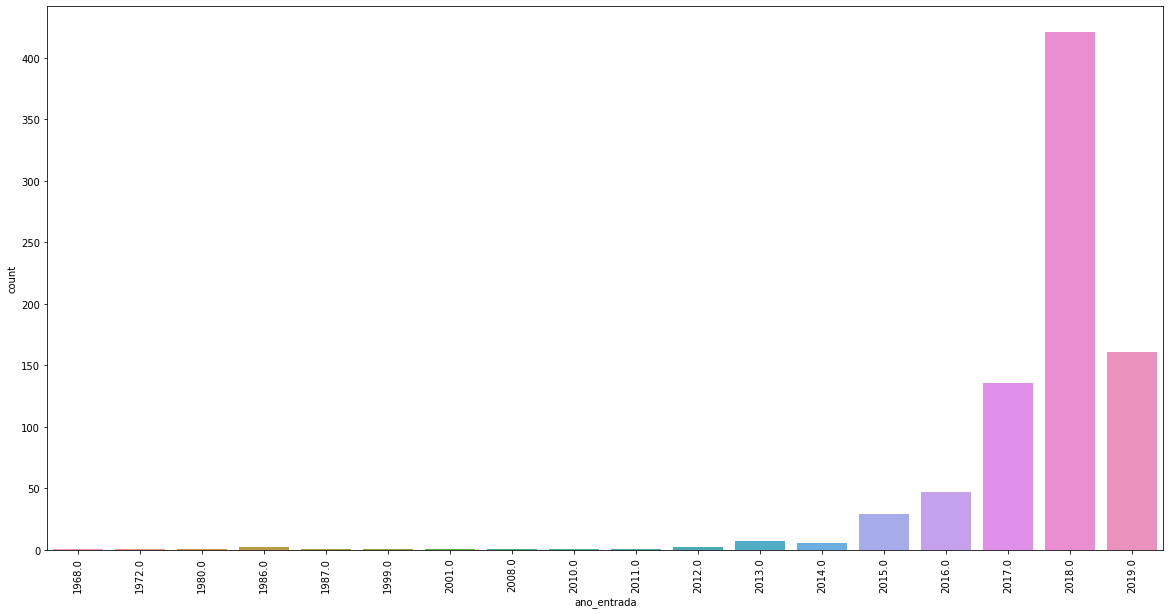

In [20]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='ano_entrada', data=df[df['pais_origem'] == 'Venezuela'])
ax.set_xticklabels(rotation=90, labels=ax.get_xticklabels())
ax

<div class="alert alert-block alert-info">
    <h2>Categorizando Dados</h2>
</div>

In [21]:
df['fx_etaria'].nunique() #Observando a variação

9

In [22]:
df['fx_etaria'].unique() #Observando valores

array(['Maiores de 60 anos', '18 a 29 anos', '40 a 49 anos',
       '30 a 39 anos', '50 a 59 anos', '12 a 17 anos', '0 a 11 anos',
       'Năo informado', '20 a 29 anos'], dtype=object)

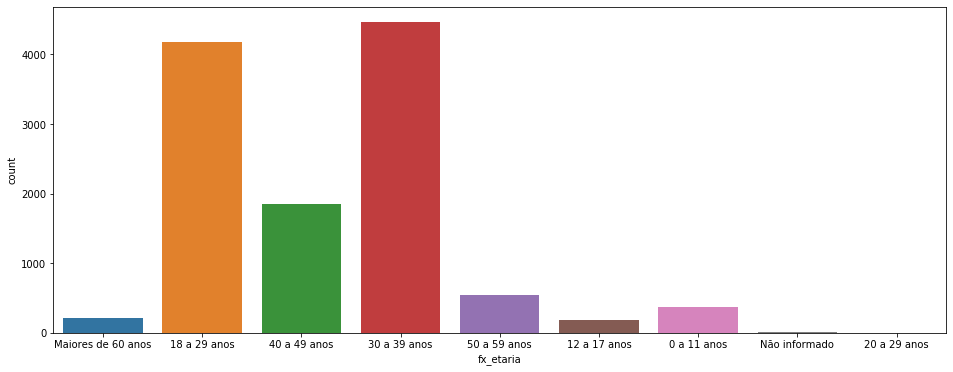

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
ax = sns.countplot(x='fx_etaria', data=df)

#### E se eu categorizar com ordem

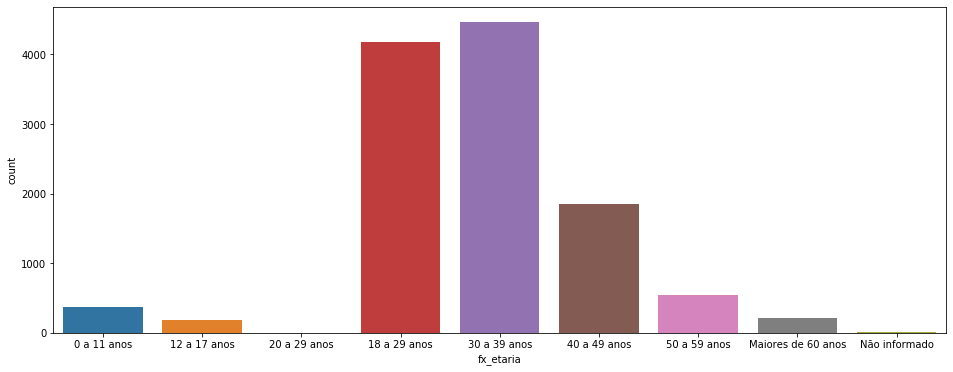

In [24]:
df['fx_etaria'] = df['fx_etaria'].astype('category')
df['fx_etaria'].cat.reorder_categories(['0 a 11 anos',
                                         '12 a 17 anos',
                                         '20 a 29 anos',
                                         '18 a 29 anos',
                                         '30 a 39 anos',
                                         '40 a 49 anos',
                                         '50 a 59 anos',
                                         'Maiores de 60 anos',  
                                          'Năo informado'], inplace=True)
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='fx_etaria', data=df)

#### Peraí, tem grupo de intersecção de idade
- Vamos então olhar as pessoas dessa faixa

In [25]:
df[df['fx_etaria'] == '20 a 29 anos']

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1,data_entrada_brasil_formatado,ano_entrada
8931,Năo informado,24/04/2017,Năo informado,Masculino,20 a 29 anos,República da Guiné,Bela Vista,Em situaçăo de rua,Guarulhos,Preta,Ensino superior incompleto,Refugiado,Desempregado,Outros,Regularizaçăo migratória,NaT,NaN


#### O que fazer?
- Decidimos por unir com a faixa mais próxima
- O correto https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iat.html

In [26]:
df.loc[df['fx_etaria'] == '20 a 29 anos', 'fx_etaria'] = '18 a 29 anos'
df[df['fx_etaria'] == '20 a 29 anos']

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1,data_entrada_brasil_formatado,ano_entrada


<div class="alert alert-block alert-info">
    <h2>"DesCategorizando" Dados</h2>
</div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [27]:
df_corr = df[['pais_origem', 'cor_raca']]

df_corr = df_corr[(df_corr['pais_origem'] == 'Angola') | (df_corr['pais_origem'] == 'Venezuela')]

df_corr = pd.get_dummies(df_corr, columns=['pais_origem', 'cor_raca'])
df_corr.tail()

,pais_origem_Angola,pais_origem_Venezuela,cor_raca_Amarela,cor_raca_Branca,cor_raca_Indígena,cor_raca_Năo informado,cor_raca_Năo respondeu,cor_raca_Outras,cor_raca_Parda,cor_raca_Preta
11818,0,1,0,0,0,0,1,0,0,0
11819,0,1,0,0,0,0,1,0,0,0
11820,0,1,0,0,0,0,1,0,0,0
11821,0,1,0,0,0,0,0,1,0,0
11822,0,1,0,0,0,0,0,0,1,0


In [28]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,pais_origem_Angola,pais_origem_Venezuela,cor_raca_Amarela,cor_raca_Branca,cor_raca_Indígena,cor_raca_Năo informado,cor_raca_Năo respondeu,cor_raca_Outras,cor_raca_Parda,cor_raca_Preta
pais_origem_Angola,1.000000,-1.000000,-0.008685,-0.554739,-0.107817,0.016049,-0.345681,-0.096514,-0.492827,0.887903
pais_origem_Venezuela,-1.000000,1.000000,0.008685,0.554739,0.107817,-0.016049,0.345681,0.096514,0.492827,-0.887903
cor_raca_Amarela,-0.008685,0.008685,1.000000,-0.007902,-0.001498,-0.000864,-0.005629,-0.001498,-0.007231,-0.056358
cor_raca_Branca,-0.554739,0.554739,-0.007902,1.000000,-0.015822,-0.009126,-0.059446,-0.015822,-0.076355,-0.595131
cor_raca_Indígena,-0.107817,0.107817,-0.001498,-0.015822,1.000000,-0.001730,-0.011271,-0.003000,-0.014478,-0.112842
cor_raca_Năo informado,0.016049,-0.016049,-0.000864,-0.009126,-0.001730,1.000000,-0.006501,-0.001730,-0.008350,-0.065084
cor_raca_Năo respondeu,-0.345681,0.345681,-0.005629,-0.059446,-0.011271,-0.006501,1.000000,-0.011271,-0.054394,-0.423965
cor_raca_Outras,-0.096514,0.096514,-0.001498,-0.015822,-0.003000,-0.001730,-0.011271,1.000000,-0.014478,-0.112842
cor_raca_Parda,-0.492827,0.492827,-0.007231,-0.076355,-0.014478,-0.008350,-0.054394,-0.014478,1.000000,-0.544560
cor_raca_Preta,0.887903,-0.887903,-0.056358,-0.595131,-0.112842,-0.065084,-0.423965,-0.112842,-0.544560,1.000000


<div class="alert alert-block alert-info">
    <h2>Amostragem</h2>
</div>

### Aleatória

In [29]:
df_ale = df.sample(n=100)
df_ale.head()

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1,data_entrada_brasil_formatado,ano_entrada
465,01/04/2016,05/04/2016,0,Feminino,18 a 29 anos,Angola,Vila Mariana,Centro de Acolhida,Năo informado,Preta,Ensino superior completo,Solicitante de refúgio,Năo informado,Năo informado,Năo informado,2016-04-01,2016.0
9061,Năo informado,08/12/2014,Năo informado,Masculino,40 a 49 anos,República Democrática do Congo,Năo informado,Centro de Acolhida,Năo informado,Branca,Ensino médio completo,Visto temporário,Năo informado,Năo informado,Năo informado,NaT,NaN
3546,16/01/2015,04/09/2019,55,Masculino,50 a 59 anos,Bangladesh,Penha,Casa própria,Guarulhos,Parda,Ensino médio incompleto,Visto permanente,Trabalhador autônomo,Outros,Regularizaçăo migratória,2015-01-16,2015.0
287,20/02/2016,25/02/2016,0,Masculino,30 a 39 anos,Angola,Itaquera,Aluguel ou pensăo,Năo informado,Preta,Ensino médio completo,Solicitante de refúgio,Năo informado,Năo informado,Regularizaçăo migratória,2016-02-20,2016.0
11202,26/01/2018,19/04/2018,2,Masculino,30 a 39 anos,Venezuela,Săo Mateus,Centro de Acolhida,Boa Vista,Năo respondeu,Ensino médio incompleto,Solicitante de refúgio,Desempregado,Instituiçőes ou organizaçőes,Orientaçăo jurídica,2018-01-26,2018.0


<div class="alert alert-block alert-info">
    <h2>Missing Values</h2>
</div>

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html  

https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna  

/home/thiagokuma/anaconda3/envs/aula03/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


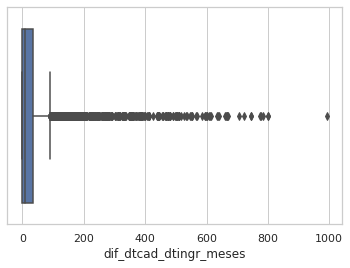

In [30]:
df_dif = df[(df['dif_dtcad_dtingr_meses'] != 'Năo informado') & (df['dif_dtcad_dtingr_meses'] != 'Incongruencia')]
df_dif['dif_dtcad_dtingr_meses'] = df_dif['dif_dtcad_dtingr_meses'].astype('int')

sns.set(style='whitegrid')
ax = sns.boxplot(data=df_dif, x='dif_dtcad_dtingr_meses')

In [31]:
moda = df_dif['dif_dtcad_dtingr_meses'].mode()
moda

0    0
dtype: int64

In [32]:
media = df_dif['dif_dtcad_dtingr_meses'].mean()
media

29.13437444856185

In [33]:
mediana = df_dif['dif_dtcad_dtingr_meses'].median()
mediana

10.0

In [34]:
df.loc[df['dif_dtcad_dtingr_meses'] == 'Năo informado', 'dif_dtcad_dtingr_meses'] = '0'
df.loc[df['dif_dtcad_dtingr_meses'] == 'Incongruencia', 'dif_dtcad_dtingr_meses'] = '0'

df['dif_dtcad_dtingr_meses'] = df['dif_dtcad_dtingr_meses'].astype('int')
df.describe()

,dif_dtcad_dtingr_meses,ano_entrada
count,11834.000000,11367.000000
mean,27.903414,2015.111551
std,61.489794,5.204819
min,0.000000,1934.000000
25%,0.000000,2015.000000
50%,8.000000,2016.000000
75%,34.000000,2017.000000
max,992.000000,2019.000000


In [35]:
df_dif.describe()

,dif_dtcad_dtingr_meses,ano_entrada
count,11334.000000,11334.000000
mean,29.134374,2015.106494
std,62.545518,5.211206
min,0.000000,1934.000000
25%,0.000000,2015.000000
50%,10.000000,2016.000000
75%,36.000000,2017.000000
max,992.000000,2019.000000


<div class="alert alert-block alert-info">
    <h2>Data Profile</h2>
</div>

In [36]:
from pandas_profiling import ProfileReport

df = pd.read_csv('bancocrai2014a2019.csv', sep=';', encoding='iso8859_2')

profile = ProfileReport(df)
profile

In [37]:
profile.to_file(output_file="aula03_profile.html")